# MICrONS NWB tutorial

This tutorial demonstrates how to access the [MICrONS functional data](https://dandiarchive.org/dandiset/000402/draft) using `dandi`.

The functional data from the [MICrONS project](https://www.microns-explorer.org/cortical-mm3) contains calcium imaging recorded from multiple cortical visual areas and behavioral measurements while a mouse viewed natural movies and parametric stimuli.


#### Contents:
* [Streaming NWB files](#stream-nwb)
* [Access data and metadata](#access-nwb)
* [Access the coregistration table from the CAVE database](#access-cave)
* [View NWB files with NWBWidgets](#view-nwb)
* [Downloading NWB files](#download-nwb)

## Streaming NWB files <a class="anchor" id="stream-nwb"></a>

This section demonstrates how to access the files on DANDI without downloading them.

Based on the [Streaming NWB files](https://pynwb.readthedocs.io/en/stable/tutorials/advanced_io/streaming.html) tutorial from `PyNWB`.

The `DandiAPIClient` can be used to get the S3 URL of the NWB file stored in the DANDI Archive. 

In [1]:
from dandi.dandiapi import DandiAPIClient

dandiset_id = "000402"
file_path = "sub-17797/sub-17797_ses-9-scan-4_behavior+image+ophys.nwb" # file size ~67GB

# Get the location of the file on DANDI
with DandiAPIClient() as client:
    asset = client.get_dandiset(dandiset_id, 'draft').get_asset_by_path(file_path)
    s3_url = asset.get_content_url(follow_redirects=1, strip_query=True)

Create a virtual filesystem using `fsspec` which will take care of requesting data from the S3 bucket whenever data is read from the virtual file.

In [2]:
from fsspec.implementations.cached import CachingFileSystem
from fsspec import filesystem
from h5py import File
from pynwb import NWBHDF5IO


# Create a virtual filesystem based on the http protocol and use caching to save accessed data to RAM.
fs = filesystem("http")
file_system = fs.open(s3_url, "rb")
file = File(file_system, mode="r")
# Open the file with NWBHDF5IO
io = NWBHDF5IO(file=file, load_namespaces=True)

nwbfile = io.read()

## Access data and metadata <a class="anchor" id="access-nwb"></a>

This section demonstrates how to access the data in the NWB files.


### Subject

The `nwbfile.subject` field holds information about the experimental subject, such as age (in [ISO 8601 Duration format](https://en.wikipedia.org/wiki/ISO_8601#Durations)), sex, and species in latin binomial nomenclature.

In [3]:
# Access the subject metadata
nwbfile.subject

subject pynwb.file.Subject at 0x140377596965936
Fields:
  age: P75D/P81D
  sex: M
  species: Mus musculus
  subject_id: 17797

### Trials

#### Clip

This stimulus condition is composed of 10 second clips. The trials for this condition can be accessed as `nwbfile.intervals["Clip"]`.

In [4]:
# View the description for this stimulus type
print(nwbfile.intervals["Clip"].description)
# Load the data into a dataframe object
clip_dataframe = nwbfile.intervals["Clip"].to_dataframe()

Composed of 10 second clips from cinematic releases, Sports-1M dataset, or custom rendered first person POV videos in 3D environment in Unreal Engine.


In [5]:
clip_dataframe

,start_time,stop_time,stimulus_type,condition_hash,movie_name,short_movie_name,duration
id,,,,,,,
4,269.464581,279.431084,stimulus.Clip,okYfMyn8qc2ClgvpS7WG,2009 Skijoring Event in Whitefish Montana (par...,sports1m,10.0
5,279.531081,289.497598,stimulus.Clip,NHlF8hOkZ6psFRIVhB6N,ancienttomb_107-1-4-70-0_54.165.28.255,Rendered,10.0
6,289.597593,299.564101,stimulus.Clip,AxNNo310kAl9uUSr+hXS,medievalsewer_009-1-6-70-0_107.23.36.15,Rendered,10.0
7,299.664089,309.630596,stimulus.Clip,mjtZRmGqaXCHGB59txoI,Powaqqatsi: Life in Transformation (1988),Cinematic,10.0
8,309.730601,319.697093,stimulus.Clip,W50xYLSTlUixv1tOfuSJ,2011 Boulder Cup Cyclocross Elite Women,sports1m,10.0
...,...,...,...,...,...,...,...
459,5229.733599,5239.700111,stimulus.Clip,BmdZ8rRGTB6ueDkz+Kr/,shintonight_095-1-13-70-0_54.89.40.102,Rendered,10.0
460,5239.800111,5249.766615,stimulus.Clip,WslKzH0v/OEqVTLiw468,2011 June 14 Midweek MTB Corner Canyon XC Moun...,sports1m,10.0
461,5249.866617,5259.833112,stimulus.Clip,eNJ7fFpiRbVfX48l845P,2011 August 2 Midweek MTB Solitude XC Mountain...,sports1m,10.0


#### Monet2

This stimulus condition is generated from smoothened Gaussian noise and a global orientation and direction component. The trials for this condition can be accessed as `nwbfile.intervals["Monet2"]`.

In [6]:
# View the description for this stimulus type
print(nwbfile.intervals["Monet2"].description)
# Load the data into a dataframe object
monet2_dataframe = nwbfile.intervals["Monet2"].to_dataframe()

Generated from smoothened Gaussian noise and a global orientation and direction component.


In [7]:
monet2_dataframe.head()

,start_time,stop_time,stimulus_type,condition_hash,rng_seed,duration,blue_green_saturation,pattern_width,pattern_aspect,temp_kernel,temp_bandwidth,ori_coherence,ori_fraction,ori_mix,num_directions
id,,,,,,,,,,,,,,,
0,209.198904,224.181996,stimulus.Monet2,WD0uyxvusJmVxfeKu9mZ,1.0,15.0,0,72,1.7,hamming,4.0,2.5,1.0,1.0,16
1,224.281990,239.265071,stimulus.Monet2,kEq0YeYOSSBtM1ZkWA1a,4.0,15.0,0,72,1.7,hamming,4.0,2.5,1.0,1.0,16
2,239.348411,254.331497,stimulus.Monet2,clN4ica4q7huSnWVFTFi,3.0,15.0,0,72,1.7,hamming,4.0,2.5,1.0,1.0,16
3,254.414823,269.397922,stimulus.Monet2,NnOFXtdjpcasByEfeJf9,2467.0,15.0,0,72,1.7,hamming,4.0,2.5,1.0,1.0,16
50,752.506706,767.489783,stimulus.Monet2,yv/S61fYnDSQcA9J6Nk8,7.0,15.0,0,72,1.7,hamming,4.0,2.5,1.0,1.0,16


#### Trippy

The stimulus table for the cosine of a smoothened noise phase movie can be accessed as `nwbfile.intervals["Trippy"]`.

In [8]:
# View the description for this stimulus type
print(nwbfile.intervals["Trippy"].description)
# Load the data into a dataframe object
trippy_dataframe = nwbfile.intervals["Trippy"].to_dataframe()

The stimulus table for the cosine of a smoothened noise phase movie.


In [9]:
trippy_dataframe.head()

,start_time,stop_time,stimulus_type,condition_hash,rng_seed,texture_height,texture_width,duration,xnodes,ynodes,up_factor,temp_freq,temp_kernel_length,spatial_freq
id,,,,,,,,,,,,,,
10,329.863606,344.846688,stimulus.Trippy,e9eVr8Agj8TsRJR3XEBg,1007.0,90,160,15.0,12,6,24,4.0,61,0.08
11,344.930015,359.913113,stimulus.Trippy,tRgm529SPpQspr220FRm,2.0,90,160,15.0,12,6,24,4.0,61,0.08
12,359.996445,374.979541,stimulus.Trippy,hhWRsNy4ljt4M1PtvZ3u,6.0,90,160,15.0,12,6,24,4.0,61,0.08
13,375.062862,390.045950,stimulus.Trippy,ZJvulWBItHtLlDVkIntm,8.0,90,160,15.0,12,6,24,4.0,61,0.08
94,1235.298793,1250.281879,stimulus.Trippy,EhwIk1vM51LHZPE6xFZX,5.0,90,160,15.0,12,6,24,4.0,61,0.08


### Stimulus movie data

The visual stimulus composed of parametric stimuli and natural movie clips.

The movie data is stored in an `ImageSeries` object.

The frames are stored in a 4D array where the first dimension is time (frame), the second and third dimenion represents the size of the image and the last dimension are the RGB channels.

In [10]:
# Access the fields for movie data
movie = nwbfile.acquisition["Video: stimulus_17797_9_4_v4"]
movie

Video: stimulus_17797_9_4_v4 pynwb.image.ImageSeries at 0x140377596967040
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (348291, 144, 256, 3), type "|u1">
  description: The visual stimulus is composed of natural movie clips ~60 fps.
  interval: 1
  offset: 0.0
  resolution: -1.0
  timestamps: <HDF5 dataset "timestamps": shape (348291,), type "<f8">
  timestamps_unit: seconds
  unit: Frames

Data arrays are read passively from the NWB file. Accessing the data attribute of the `ImageSeries` object does not read the data values, but presents an `HDF5` object that can be indexed to read data.

You can use the `[:]` operator to read the entire data array into memory. (e.g. `movie.data[:]`)

To read only a portion of data at a time, index or slice into the data attribute just like if you were indexing or slicing a numpy array.

In [11]:
# Read the first 500 frames from the movie data
movie_data = movie.data[:500]

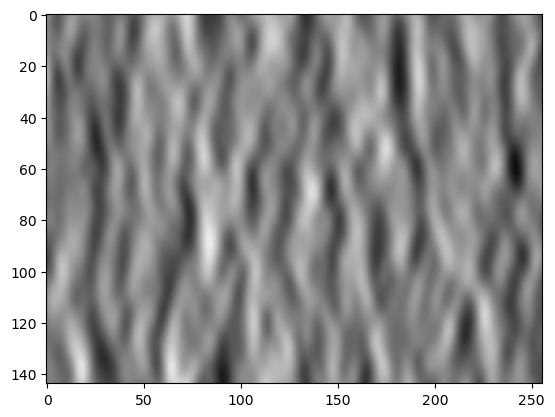

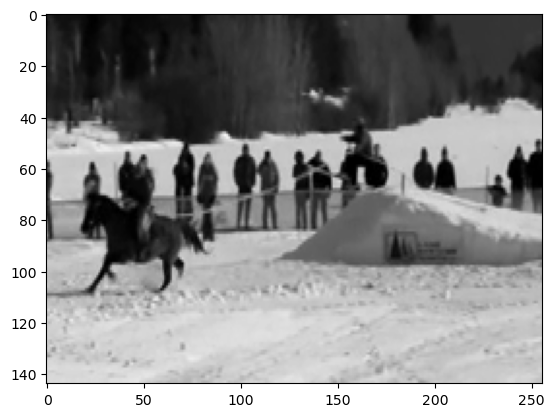

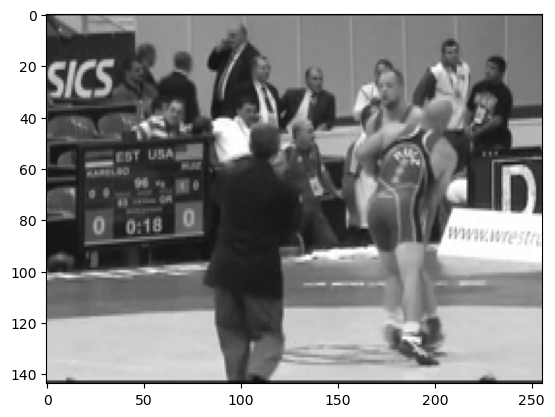

In [12]:
# Show frames from the movie.
from matplotlib import pyplot as plt

plt.imshow(movie.data[11900], aspect="auto")
plt.show()

plt.imshow(movie.data[15680], aspect="auto")
plt.show()

plt.imshow(movie.data[110600], aspect="auto")
plt.show()

### Two Photon Imaging

The two photon data contains 50000 imaging volumes collected at ~8.6 Hz, with six fields per volume.
The center of the volume was placed at the junction of primary visual cortex (VISp) and three higher visual areas, lateromedial area (VISlm), rostrolateral area (VISrl) and anterolateral area (VISal).

The imaging data for each field is stored in a `TwoPhotonSeries` object which can be accessed from `nwbfile.acqusition`.

The information about the imaging plane can accessed as `nwbfile.acquisition["TwoPhotonSeries1"].imaging_plane` or from `nwbfile.imaging_planes["ImagingPlane1"]`.

In [13]:
# The two photon imaging data for field 1
two_photon_series1 = nwbfile.acquisition["TwoPhotonSeries1"]
# The timestamps for the imaging data
two_photon_series1_timestamps = nwbfile.acquisition["TwoPhotonSeries1"].timestamps[:]     
print(two_photon_series1.data.shape)
            
# The two photon imaging data for field 2
two_photon_series2 = nwbfile.acquisition["TwoPhotonSeries2"]
            
# The two photon imaging data for field 3
two_photon_series3 = nwbfile.acquisition["TwoPhotonSeries3"]

(50000, 248, 440)


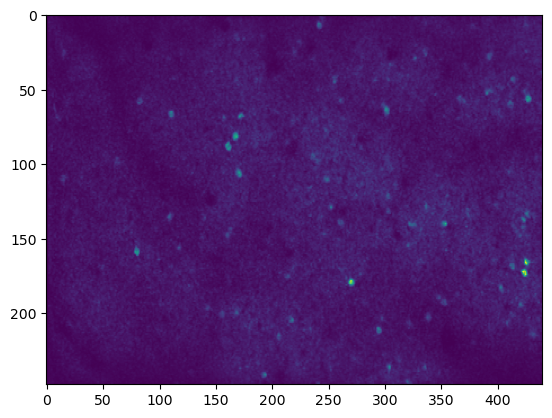

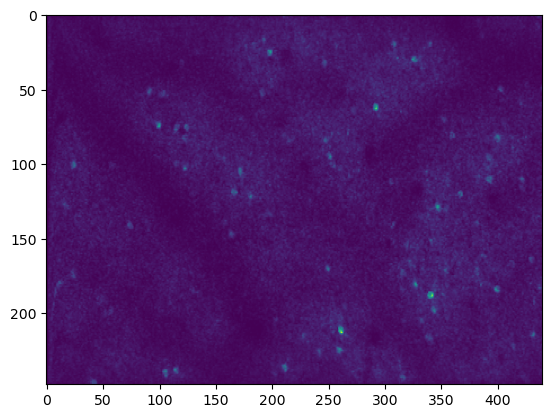

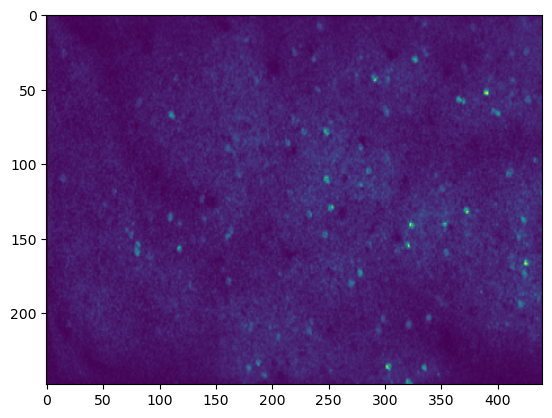

In [14]:
# Visualize the imaging data.

from matplotlib import pyplot as plt

plt.imshow(two_photon_series1.data[2200], aspect="auto")
plt.show()

plt.imshow(two_photon_series2.data[2200], aspect="auto")
plt.show()

plt.imshow(two_photon_series3.data[2200], aspect="auto")
plt.show()


### Fluorescence traces

The "ophys" processing module contains the fluorescence traces, and image segmentations which can be accessed as `nwbfile.processing["ophys"]`. 

The fluorescence traces for each field are stored in `RoiResponseSeries` objects in a `Fluorescence` container within the "ophys" processing module as `nwbfile.processing["ophys"].data_interfaces`. 


In [20]:
fluorescence = nwbfile.processing["ophys"].data_interfaces["Fluorescence"]
# The fluorescence traces for field 1 
fluorescence.roi_response_series['RoiResponseSeries1']

roi_response_series = fluorescence.roi_response_series['RoiResponseSeries1']

The traces are stored in a 2D array where the first dimension is time, the second dimenion is the number of ROIs for this field.

In [21]:
roi_response_series.data.shape

(50000, 1410)

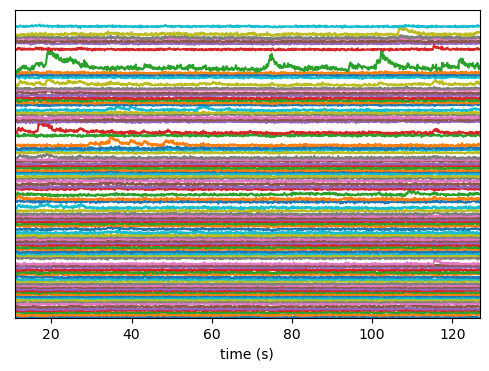

In [22]:
# get first 1000 samples of the fluorescence traces of first 100 ROIs
traces = fluorescence.roi_response_series['RoiResponseSeries1'].data[:1000, :100]

# get times of first 1000 samples
timestamps = fluorescence.roi_response_series['RoiResponseSeries1'].timestamps[:1000]

# plot fluorescence data
import numpy as np
import matplotlib.pyplot as plt

offsets = np.cumsum(np.hstack((0, np.max(traces, axis=0)[:-1])))

fix, ax = plt.subplots(figsize=(6, 4))
plt.plot(timestamps, traces + offsets)
ax.set_xlim(min(timestamps), max(timestamps))
ax.set_ylim(0, None)
ax.set_xlabel("time (s)")
_ = ax.set_yticks([])

The image masks for each field are stored in `PlaneSegmentation` objects in an `ImageSegmentation` container within the "ophys" processing module.

In [23]:
image_segmentation = nwbfile.processing["ophys"].data_interfaces["ImageSegmentation"]

# The plane segmentation for field 1 
plane_segmentation1 = image_segmentation.plane_segmentations["PlaneSegmentation1"]

# view plane segmentation table
plane_segmentation1.to_dataframe()

,image_mask,mask_type
id,,
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",soma
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",artifact
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",soma
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",soma
5,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",soma
...,...,...
1406,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",soma
1407,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",soma
1408,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",soma


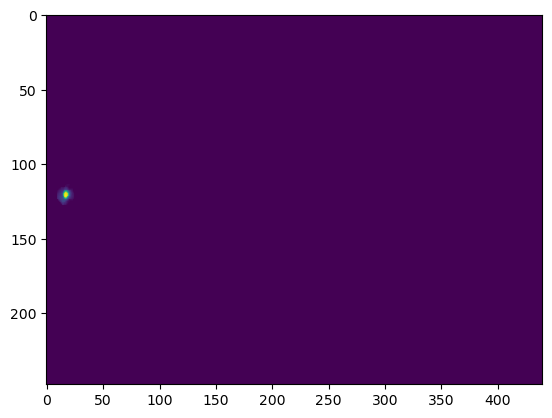

In [24]:
# view example image mask for ROI #5
plt.imshow(plane_segmentation1["image_mask"][5], aspect="auto")

### Accessing the coregistration table from the CAVE database <a class="anchor" id="access-cave"></a>

The functional data were co-registered with electron microscopy (EM) data. The structural identifiers of the matched cells are added as plane segmentation columns extracted from the CAVE database.

To access the latest revision see the notebook [this notebook](https://github.com/cajal/microns_phase3_nda/blob/d11ab79e49f424b350b3b07dbcd8c141a01cd37a/notebooks/Overview_Matched_Cell_Functional_Data.ipynb). The structural ids might not be present for all plane segmentations.

The "cave_ids" are the identifiers from the CAVE database (can be more than one for a given cell), "pt_position_x", "pt_position_y" and "pt_position_z" corresponds to the location in 4,4,40 nm voxels at a cell body for the cell, 
"pt_supervoxel_id" is the ID of the supervoxel from the watershed segmentation, "pt_root_id" is the ID of the segment/root_id from the Proofread Segmentation (v117).

In [12]:
image_segmentation = nwbfile.processing["ophys"].data_interfaces["ImageSegmentation"]
# The plane segmentation for field 4
plane_segmentation4 = image_segmentation.plane_segmentations["PlaneSegmentation4"][:]
plane_segmentation4

,image_mask,mask_type,cave_ids,pt_supervoxel_id,pt_root_id,pt_x_position,pt_y_position,pt_z_position
id,,,,,,,,
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",artifact,[nan],NaN,NaN,NaN,NaN,NaN
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",artifact,[nan],NaN,NaN,NaN,NaN,NaN
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",soma,[4310.0],1.120332e+17,8.646911e+17,343888.0,107008.0,15649.0
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",soma,[nan],NaN,NaN,NaN,NaN,NaN
5,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",soma,[nan],NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1400,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",soma,[nan],NaN,NaN,NaN,NaN,NaN
1401,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",soma,[6985.0],9.275343e+16,8.646911e+17,203737.0,116074.0,23591.0
1402,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",artifact,[nan],NaN,NaN,NaN,NaN,NaN


In [13]:
# The structural ids for field 4 
plane_segmentation4.dropna()

,image_mask,mask_type,cave_ids,pt_supervoxel_id,pt_root_id,pt_x_position,pt_y_position,pt_z_position
id,,,,,,,,
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",soma,[4310.0],1.120332e+17,8.646911e+17,343888.0,107008.0,15649.0
8,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",soma,[2243.0],1.132301e+17,8.646911e+17,352640.0,111392.0,19327.0
12,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",soma,[2244.0],1.136521e+17,8.646911e+17,355616.0,109728.0,20087.0
16,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",soma,[8945.0],1.138626e+17,8.646911e+17,356899.0,105465.0,22206.0
26,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",soma,[2245.0],1.116119e+17,8.646911e+17,340608.0,113856.0,18439.0
...,...,...,...,...,...,...,...,...
1381,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",soma,[2296.0],1.047158e+17,8.646911e+17,290656.0,113904.0,21738.0
1390,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",soma,[9303.0],9.233204e+16,8.646911e+17,200481.0,122465.0,17207.0
1394,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",soma,[4360.0],1.048560e+17,8.646911e+17,291504.0,110000.0,15556.0


The average and correlation images for each field are stored in `GrayscaleImage` objects in an `Images` container within the "ophys" processing module.

In [15]:
# The average and correlation images for field 1
segmentation_images1 = nwbfile.processing["ophys"].data_interfaces["SegmentationImages1"]
# Load the average image data
average_image = segmentation_images1.images["average"][:]
# Load the correlation image data
correlation_image = segmentation_images1.images["correlation"][:]

segmentation_images1   

SegmentationImages1 pynwb.base.Images at 0x140543021331312
Fields:
  description: Correlation and average images for field 1.
  images: {
    average <class 'pynwb.image.GrayscaleImage'>,
    correlation <class 'pynwb.image.GrayscaleImage'>
  }

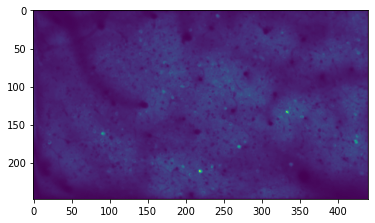

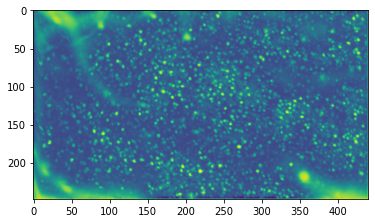

In [25]:
# Show the average and correlation images for field 1
plt.imshow(average_image)
plt.show()

plt.imshow(correlation_image)
plt.show()

### Behavior

The raw behavior data is composed of the velocity of the treadmill, eye movements and the pupil diameter data.

The velocity of the treadmill is stored in a `TimeSeries` object.

In [17]:
# Access the treadmill velocity
treadmill_velocity = nwbfile.acquisition["treadmill_velocity"]
# Acess the timestamps for the treadmill velocity
treadmill_timestamps = treadmill_velocity.timestamps[:]
            
treadmill_velocity

treadmill_velocity pynwb.base.TimeSeries at 0x140543020526896
Fields:
  comments: no comments
  conversion: 0.01
  data: <HDF5 dataset "data": shape (374122,), type "<f8">
  description: Cylindrical treadmill rostral-caudal position extracted at ~60-100 Hz and converted into velocity.
  interval: 1
  offset: 0.0
  resolution: -1.0
  timestamps: <HDF5 dataset "timestamps": shape (374122,), type "<f8">
  timestamps_unit: seconds
  unit: m/s

The position of the eye is stored in a `SpatialSeries` object which is stored in an `EyeTracking` container.

In [18]:
nwbfile.acquisition["EyeTracking"]

EyeTracking pynwb.behavior.EyeTracking at 0x140543017131696
Fields:
  spatial_series: {
    eye_position <class 'pynwb.behavior.SpatialSeries'>
  }

In [19]:
eye_position = nwbfile.acquisition["EyeTracking"].spatial_series["eye_position"]

eye_position

eye_position pynwb.behavior.SpatialSeries at 0x140542784001072
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (101678, 2), type "<f8">
  description: The x,y position of the pupil.The values are estimated in the relative pixel units.
  interval: 1
  offset: 0.0
  reference_frame: unknown
  resolution: -1.0
  timestamps: pupil_minor_radius pynwb.base.TimeSeries at 0x140542784003040
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (101678,), type "<f8">
  description: Minor radius extracted from the pupil tracking ellipse.The values are estimated in the relative pixel units.
  interval: 1
  offset: 0.0
  resolution: -1.0
  timestamp_link: (
    eye_position <class 'pynwb.behavior.SpatialSeries'>,
    pupil_major_radius <class 'pynwb.base.TimeSeries'>
  )
  timestamps: <HDF5 dataset "timestamps": shape (101678,), type "<f8">
  timestamps_unit: seconds
  unit: px

  timestamps_unit: seconds
  unit: px

The pupil major and minor radius are stored as `TimeSeries` objects and they can be accessed from an `EyeTracking` container.

In [20]:
pupil_major_radius = nwbfile.acquisition['PupilTracking'].time_series["pupil_major_radius"]
pupil_minor_radius = nwbfile.acquisition['PupilTracking'].time_series["pupil_minor_radius"]
            
pupil_major_radius

pupil_major_radius pynwb.base.TimeSeries at 0x140543017160368
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (101678,), type "<f8">
  description: Major radius extracted from the pupil tracking ellipse.The values are estimated in the relative pixel units.
  interval: 1
  offset: 0.0
  resolution: -1.0
  timestamps: pupil_minor_radius pynwb.base.TimeSeries at 0x140542784003040
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (101678,), type "<f8">
  description: Minor radius extracted from the pupil tracking ellipse.The values are estimated in the relative pixel units.
  interval: 1
  offset: 0.0
  resolution: -1.0
  timestamp_link: (
    eye_position <class 'pynwb.behavior.SpatialSeries'>,
    pupil_major_radius <class 'pynwb.base.TimeSeries'>
  )
  timestamps: <HDF5 dataset "timestamps": shape (101678,), type "<f8">
  timestamps_unit: seconds
  unit: px

  timestamps_unit: seconds
  unit: px

### Time references

The timestamps in an NWB file should be in seconds with respect to the global start time of the session.
The original time references were relative to scan start which would have produced negative timestamps for the behavior data. Therefore, all times were shifted to the earliest behavioral timestamp.

In this file for instance, time `0.0` corresponds to the first timestamp for the treadmill velocity data while the two photon imaging started `10.899` seconds after.

In [21]:
treadmill_timestamps[0]

0.0

In [22]:
two_photon_series1_timestamps[0]

10.899238834999977

### View NWB files <a class="anchor" id="view-nwb"></a>

This section demonstrates how to visualize the contents of an NWB file interactively using `NWBWidgets`.

#### Visualize an in-memory NWB file

Explore the NWB file using `nwb2widget`.

In [23]:
from nwbwidgets import nwb2widget

nwb2widget(nwbfile)

## Downloading NWB files <a class="anchor" id="download-nwb"></a>

This section demonstrates how to download one of the sessions from this dataset using `dandi`. 

In [ ]:
from dandi.dandiapi import DandiAPIClient
from dandi.download import download as dandi_download

dandiset_id = "000402"
file_path = "sub-17797/sub-17797_ses-9-scan-4_behavior+image+ophys.nwb" # file size ~67GB

# The folder where the file will be downloaded
dandiset_folder_path = "microns/nwbfiles/"

# The file path on DANDI
with DandiAPIClient() as client:
    asset = client.get_dandiset(dandiset_id, 'draft').get_asset_by_path(file_path)
    dandiset_url = asset.api_url

# Download the file
dandi_download(urls=dandiset_url, output_dir=dandiset_folder_path, get_metadata=True, get_assets=True)

In [ ]:
# Downloading all NWB files for this dandiset

# dandiset_url = "https://dandiarchive.org/dandiset/000402/draft"
# dandi_download(urls=dandiset_url, output_dir=dandiset_folder_path, get_metadata=True, get_assets=True)